# Testing data_zoo/dataset.py

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T
from gan_dataset import GANDataset
from dataloader import BaseDataLoader, KFoldDataLoader, OneFoldDataLoader

In [17]:
def ToPILImage(img):
    if img.ndim > 3:
        assert img.shape[0] == 1
    return T.ToPILImage()(img.squeeze().to('cpu'))

In [18]:
def plot_CycleGAN_sample(imgs):
    fig, axs = plt.subplots(nrows=1, ncols=len(imgs), squeeze=True)
    for col_idx, img in enumerate(imgs):
        ax = axs[col_idx]
        img = np.asarray(img)
        ax.imshow(img)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    fig.tight_layout()
    return fig

In [20]:
cyclegan = GANDataset(download=True, dataset="horse2zebra", transform=T.ToTensor())

In [21]:
train_dataloader = BaseDataLoader(cyclegan)

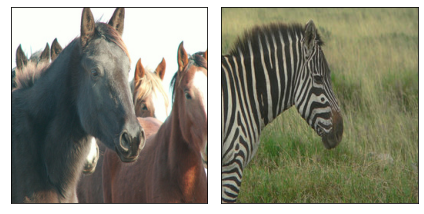

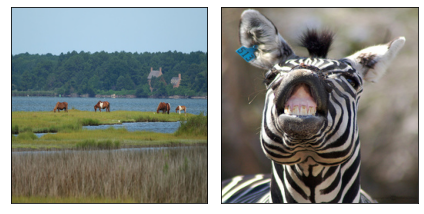

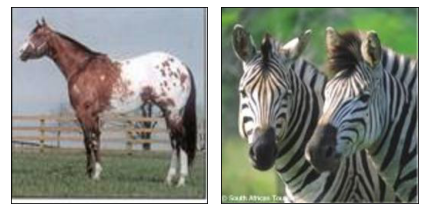

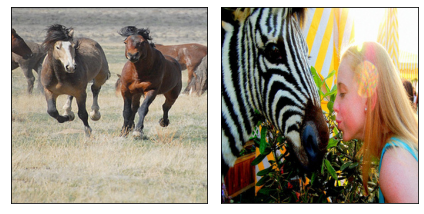

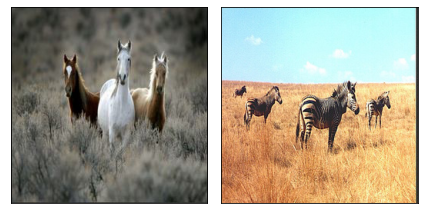

In [22]:
for (i, sample) in enumerate(train_dataloader):
    if i == 5:
        break
    A, B = ToPILImage(sample['A'][0]), ToPILImage(sample['B'][0])
    fig = plot_CycleGAN_sample([A, B]) 

In [23]:
kloader = KFoldDataLoader(cyclegan)

Fold: 1
Trainning Set Size: 1067
Validation Set Size: 267


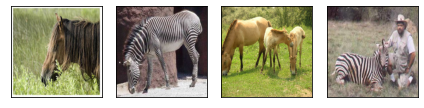

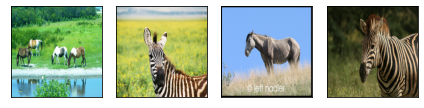

Fold: 2
Trainning Set Size: 1067
Validation Set Size: 267


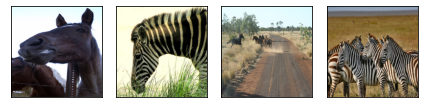

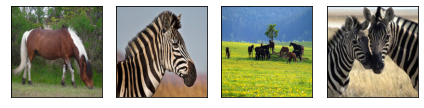

Fold: 3
Trainning Set Size: 1067
Validation Set Size: 267


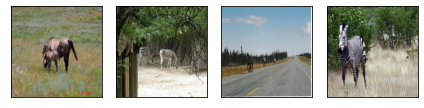

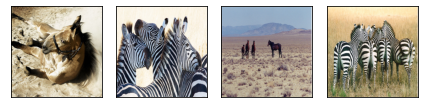

Fold: 4
Trainning Set Size: 1067
Validation Set Size: 267


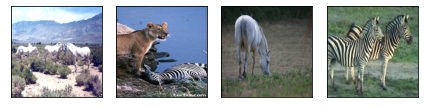

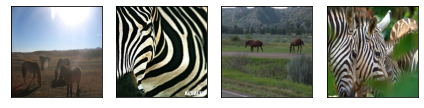

Fold: 5
Trainning Set Size: 1068
Validation Set Size: 266


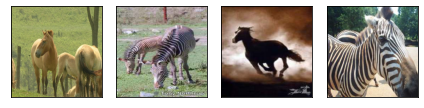

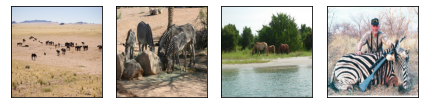

In [24]:
for (fold, train_set, val_set) in kloader:
    print(f"Fold: {fold}")
    print(f"Trainning Set Size: {len(train_set)}")
    print(f"Validation Set Size: {len(val_set)}")
    for i, (train_sample, val_sample) in enumerate(zip(train_set, val_set)):
        if i == 2:
            break
        train_A = ToPILImage(train_sample['A'][0])
        train_B = ToPILImage(train_sample['B'][0])
        val_A = ToPILImage(val_sample['A'][0])
        val_B = ToPILImage(val_sample['B'][0])
        fig = plot_CycleGAN_sample([train_A, train_B, val_A, val_B]) 
        plt.show()

In [25]:
loader = OneFoldDataLoader(cyclegan)
train_dl, val_dl = loader()

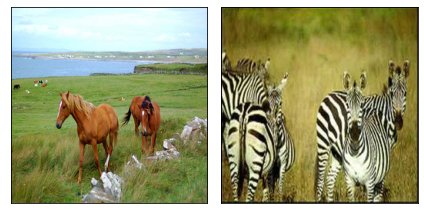

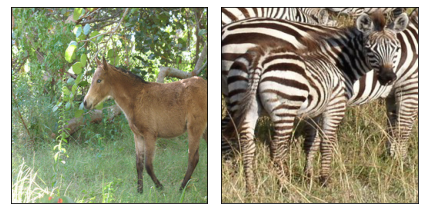

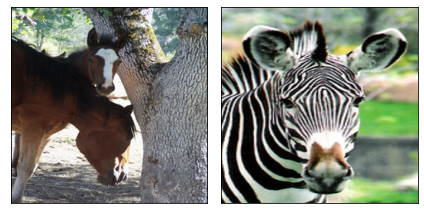

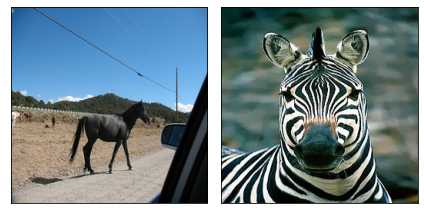

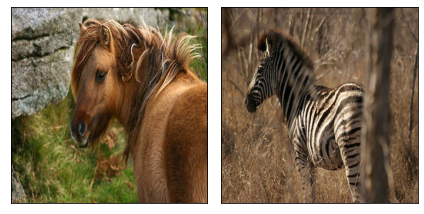

In [26]:
for (i, sample) in enumerate(train_dl):
    if i == 5:
        break
    A, B = ToPILImage(sample['A'][0]), ToPILImage(sample['B'][0])
    fig = plot_CycleGAN_sample([A, B]) 